In [1]:
import argparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from selenium import webdriver
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [2]:
from selenium import webdriver
driver = webdriver.Chrome(r"C:\Users\Saranya Gupta\Downloads\chromedriver_win32\chromedriver")
driver.maximize_window()

In [3]:
driver.get('https://www.instagram.com')

In [4]:
Sample_username = "SAMPLE USERNAME"
Sample_password = "SAMPLE PASSWORD"
username = driver.find_element_by_name('username')
username.send_keys(Sample_username)
password = driver.find_element_by_name('password') 
password.send_keys(Sample_password)
time.sleep(1)

login = driver.find_element_by_class_name('sqdOP')
login.submit()

In [5]:
# turn on notifications prompt will appear and click "not now"
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//button[contains(@class, "HoLwm")]')))
driver.find_element_by_xpath('//button[contains(@class, "HoLwm")]').click()

# 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
## 1) From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [14]:
#searching for "food" in the search bar and storing the top 10 usernames in a list
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//span[contains(@class, "TqC_a")]')))
time.sleep(2)
driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys('food')
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//span[@class="Ap253"]')))
time.sleep(3)

In [15]:
count=0
users=[] # list of top 10 users will be stored in this list.

for i in driver.find_elements_by_xpath('//span[@class="Ap253"]'):
    user_n=i.get_attribute('innerHTML')
    if user_n[0]!='#' and count<10 and user_n != "food":
        users.append(i.get_attribute('innerHTML'))
        count+=1
driver.find_element_by_xpath('//div[contains(@class, "coreSpriteSearchClear")]').click()

followers=[] # list of followers of top 10 users


for user in users:
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    driver.implicitly_wait(5)
    # checking the condition for the insta handle rather than clicking on the hashtag handle
    for i in driver.find_elements_by_class_name('Ap253'):
        if i.get_attribute('innerHTML')== user:
            i.click()
            break
    time.sleep(1)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[@class="-nal3 "]/span[@class="g47SY "]')))
    followers.append(driver.find_element_by_xpath('//a[@class="-nal3 "]/span[@class="g47SY "]').get_attribute('innerHTML'))
    time.sleep(3)

In [16]:
users

['foodtalkindia',
 'foodys',
 'dilsefoodie',
 'foodiesreunion',
 'food_all_time',
 'foodgod',
 'foodrush.recipe',
 'fooddiggers13',
 'food.darzee',
 'foodie_incarnate']

In [17]:
followers

['292k', '9.6m', '370k', '500', '592', '3.5m', '660k', '274', '67.6k', '157k']

In [18]:
# followers list contains no. of followers as a string and we need to convert this string to int
for i in range(len(followers)):
    if 'k' in followers[i]:
        followers[i]=float(followers[i][:-1])*1000
    elif 'm' in followers[i]:
        followers[i] = float(followers[i][:-1])*1000000    
    else:
        followers[i]=int("".join(followers[i].split()))

# converting from float to integer and making numpy array of followers and users
followers=np.array(followers, dtype='int')
users=np.array(users)

#sorted in descending order based on followers
users=users[np.argsort(followers)][::-1]
followers=followers[np.argsort(followers)][::-1]

#printing top 5 
top_5=[]
for i in range(5):
    print(users[i])
    top_5.append(users[i]) #top_5 is a list of users with highest number of followers among those top 10.

foodys
foodgod
foodrush.recipe
dilsefoodie
foodtalkindia


## 2) Now Find the number of posts these handles have done in the previous 3 days.

In [19]:
# returning to home page
home_btn = driver.find_element_by_xpath('//div[contains(@class,"Fifk5")]/div/a')
home_btn.click()

In [20]:
# a dictionary for the number of posts in past 3 days from the respective users and iterating to the list of top_5 and 
# finding the post from previous 3 days
num_of_posts_in_past_3_days_dict = {}

for username in top_5:
    wait = WebDriverWait(driver,10)
    search_bar_icon = wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'_0aCwM')]/div/div/span")))
    search_bar_icon.click()

    wait = WebDriverWait(driver,10)
    clear_search_content = wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'coreSpriteSearchClear')]")))
    clear_search_content.click()
    
    wait = WebDriverWait(driver,10)
    search_bar = wait.until(EC.presence_of_element_located((By.XPATH,"//input[contains(@class,'x3qfX')]")))
    search_bar.send_keys(username)
    
    wait = WebDriverWait(driver,10)
    first_suggestion = wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='fuqBx']/a/div/div[2]/div/span")))
    first_suggestion.click()

    
    num_of_posts_in_past_3_days = 0
    
    wait = WebDriverWait(driver,20)
    first_post_photo = wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class=' _2z6nI']/article/div/div/div/div/a/div/div[2]")))
    first_post_photo.click()
    
    while True:
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//time[contains(@class, "Nzb55")]')))
        time_string=driver.find_element_by_xpath('//time[contains(@class, "Nzb55")]').get_attribute('innerHTML')
        if time_string[-1] in ['h', 's']:
            num_of_posts_in_past_3_days+=1
        elif time_string[-1]=='d' and int(time_string[:-1])<=3:
            num_of_posts_in_past_3_days+=1
        else:
            break
        wait = WebDriverWait(driver,20)
        next_post_button = wait.until(EC.presence_of_element_located((By.XPATH,"//a[contains(@class,'coreSpriteRightPaginationArrow')]")))
        next_post_button.click()
        
    num_of_posts_in_past_3_days_dict[username] = num_of_posts_in_past_3_days
    
    time.sleep(2)
    close_button = driver.find_element_by_class_name('yiMZG')
    close_button.click()
    
print("Handles and their respective Number of posts in past 3 days :-")
print()
for i in range(len(num_of_posts_in_past_3_days_dict)): 
    print([*num_of_posts_in_past_3_days_dict.keys()][i] ,[*num_of_posts_in_past_3_days_dict.values()][i])
    



Handles and their respective Number of posts in past 3 days :-

foodys 0
foodgod 1
foodrush.recipe 0
dilsefoodie 5
foodtalkindia 3


## 3) Depict this information using a suitable graph.

In [21]:
# list contaning the values of no. of posts extracted from the dictionary 
no_of_posts = []
for i in num_of_posts_in_past_3_days_dict:
    no_of_posts.append(num_of_posts_in_past_3_days_dict[i])

In [22]:
no_of_posts

[0, 1, 0, 5, 3]

In [29]:
c = ['red','lime','blue','magenta','black','cyan','green','teal','aqua','gray']

<Figure size 432x288 with 0 Axes>

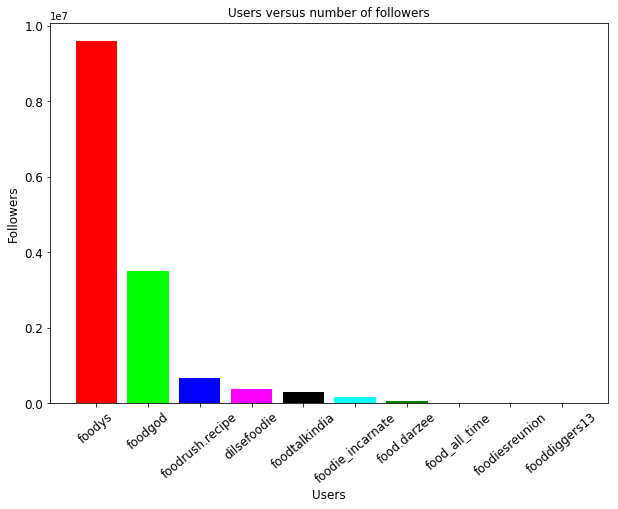

<Figure size 432x288 with 0 Axes>

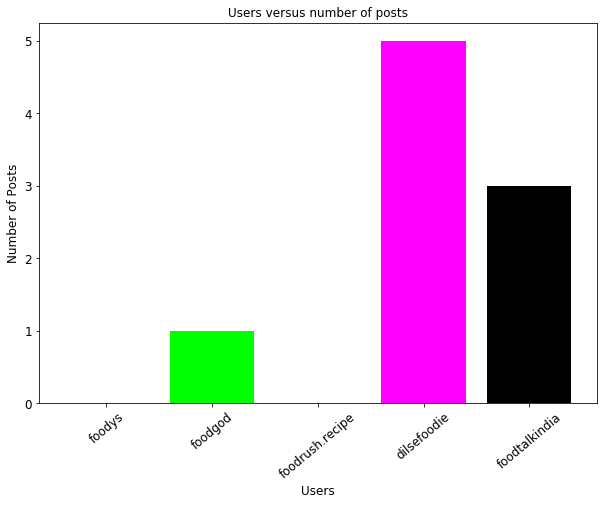

In [33]:
# plotting a graph between those 10 users and the number of followers
plt.subplots(0, 0)
plt.figure(figsize=(10, 7))
plt.bar(users, followers, color= c)
plt.xticks(rotation=40, size=12)
plt.yticks(size=12)
plt.title('Users versus number of followers', size=12)
plt.xlabel('Users', size=12)
plt.ylabel('Followers', size=12)
plt.show()

#graph between top 5 users and the number of posts
plt.subplots(0, 1)
plt.figure(figsize=(10, 7))
plt.bar(top_5, no_of_posts, color = c)
plt.xticks(rotation=40, size=12)
plt.yticks(size=12)
plt.title('Users versus number of posts', size=12)
plt.xlabel('Users', size=12)
plt.ylabel('Number of Posts', size=12)
plt.show()

# 2. Your friend also needs a list of hashtags that he should use in his posts.
## 1)Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [34]:
home_btn = driver.find_element_by_xpath('//div[contains(@class,"Fifk5")]/div/a')
home_btn.click()

In [35]:
#now we will visit each page and scrape the content and hashtags from the first 10 posts and store them in a separate list.
content=[]
hashtags=[]

for user in top_5:
    wait = WebDriverWait(driver,10)
    search_bar_icon = wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'_0aCwM')]/div/div/span")))
    search_bar_icon.click()

    wait = WebDriverWait(driver,10)
    clear_search_content = wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'coreSpriteSearchClear')]")))
    clear_search_content.click()
    
    wait = WebDriverWait(driver,10)
    search_bar = wait.until(EC.presence_of_element_located((By.XPATH,"//input[contains(@class,'x3qfX')]")))
    search_bar.send_keys(user)
    
    wait = WebDriverWait(driver,10)
    first_suggestion = wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='fuqBx']/a/div/div[2]/div/span")))
    first_suggestion.click()
    
    count = 0
    
    wait = WebDriverWait(driver,20)
    first_post_photo = wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class=' _2z6nI']/article/div/div/div/div/a/div/div[2]")))
    first_post_photo.click()
    
    while True:
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "C4VMK")]')))
        content.append(driver.find_element_by_xpath('//div[contains(@class, "C4VMK")]/span').get_attribute('textContent'))
        for hashes in driver.find_elements_by_xpath('//div[contains(@class, "C4VMK")]/span/a'):
            hashtags.append(hashes.get_attribute('innerHTML'))
        count+=1
        if count>=10:
            break
        wait = WebDriverWait(driver,20)
        next_post_button = wait.until(EC.presence_of_element_located((By.XPATH,"//a[contains(@class,'coreSpriteRightPaginationArrow')]")))
        next_post_button.click()
   
    time.sleep(2)
    close_button = driver.find_element_by_class_name('yiMZG')
    close_button.click()

In [38]:
for i in content:
    print(i)
    print('*********************************************************************************************************************')
    print()

The babka cookie 🍪built with: layers of chocolate cookie, sugar cookie, Nutella and chocolate chips! 🥰 THIS IS BEAUTIFUL! I gotta give this masterpiece 5/5 drools 🤤🤤🤤🤤🤤 Tag someone who needs to see this! @wendykou
*********************************************************************************************************************

Fried Mac N Cheese Balls 😍👌Yes please. These are perfect for quarantine season. How many drools would you give this? I give it 4/5 🤤🤤🤤🤤 What recipes have you guys been making at home? @foodyfetish
*********************************************************************************************************************

Curry Recipes 🔥🤯 @twistedWho else is a huge curry fan? It’s one of my favorite spices! I gotta give this 4/5 drools 🤤🤤🤤🤤 what would you give it?
*********************************************************************************************************************

Pan-Seared Tuna 🤤 wow does this look delicious it what?The second I saw this video I co

## 2) Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [40]:
# now i am considering that "words" mean hashtags because there will be no point in getting the frequencies of all the
# words in the content
# converting hashtags list to numpy array
hashtags=np.array(hashtags)
hash_tags=[] #it will contain only hashtags and all the usernames are filtered from the hashtags array
for i in hashtags:
    if not i[0]=='@' and i!='':
        hash_tags.append(i)

In [41]:
dic=dict() #this will store the frequencies of all the hashtags
for i in hash_tags:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
dic

{'#didnti': 1,
 '#music': 1,
 '#nationalpuppyday': 1,
 '#meatballs': 1,
 '#food': 8,
 '#foodgod': 2,
 '#😋': 1,
 '#meatball': 1,
 '#delicious': 4,
 '#dinner': 1,
 '#yummy': 3,
 '#yumm': 1,
 '#sharingiscaring': 1,
 '#cake': 1,
 '#dessertoftheday': 1,
 '#dessertheaven': 1,
 '#foodlovers': 1,
 '#dessertlover': 1,
 '#sweettooth': 1,
 '#cakelover': 1,
 '#abominación': 1,
 '#Ad21': 1,
 '#ThatsNuts': 1,
 '#f4f': 1,
 '#sdv': 1,
 '#followme': 4,
 '#foodrush': 10,
 '#appetizer': 2,
 '#chinesefood': 2,
 '#spicy': 1,
 '#easyrecipes': 2,
 '#bread': 1,
 '#schezwan': 1,
 '#holi': 1,
 '#sweet': 2,
 '#dryfruits': 1,
 '#traditionalfood': 1,
 '#festivalofcolours': 1,
 '#pasta': 3,
 '#spinach': 1,
 '#spinachpasta': 1,
 '#veggiepasta': 1,
 '#palak': 1,
 '#pastarecipe': 1,
 '#greenpasta': 1,
 '#panipuri': 1,
 '#streetfoodofindia': 1,
 '#chaat': 1,
 '#noodles': 1,
 '#garlic': 1,
 '#fenugreek': 1,
 '#creamy': 1,
 '#peas': 1,
 '#desikhana': 1,
 '#punjabi': 1,
 '#dosa': 1,
 '#southindianfood': 1,
 '#cheese': 3,


## 3) Create a csv file with two columns : the word and its frequency

In [42]:
# the file will be saved in the current workng directory
hash_word=np.array([i[1:] for i in dic.keys()])
frequency=np.array([i for i in dic.values()])
df=pd.DataFrame()
df['Words']=hash_word
df['Frequency']=frequency
df.to_csv('Word_Frequencies.csv')

## 4) Now, find the hashtags that were most popular among these bloggers

In [43]:
# arrange the arrays hash_word and frequency in descending order and print them inorder to get the most popular among 
# them.

In [44]:
hash_word=hash_word[np.argsort(frequency)][::-1]
frequency=frequency[np.argsort(frequency)][::-1]
for i in range(len(hash_word)):
    print(hash_word[i], "---", frequency[i], "times")

Dilsefoodie --- 10 times
foodrush --- 10 times
food --- 8 times
foodie --- 8 times
foodtalk --- 7 times
foodtalkindia --- 5 times
instagood --- 5 times
staysafe --- 4 times
followme --- 4 times
delicious --- 4 times
igers --- 4 times
foodporn --- 3 times
instafood --- 3 times
bestoftheday --- 3 times
italianfood --- 3 times
cheese --- 3 times
jantacurfew --- 3 times
yummy --- 3 times
instalike --- 3 times
pasta --- 3 times
foodstagram --- 3 times
tweegram --- 3 times
socialdistancing --- 2 times
workfromhome --- 2 times
coronacovid19 --- 2 times
isolation --- 2 times
pizza --- 2 times
sweet --- 2 times
foodphotography --- 2 times
italy --- 2 times
cooking --- 2 times
restaurant --- 2 times
foodgasm --- 2 times
homemade --- 2 times
foodlover --- 2 times
wfh --- 2 times
italian --- 2 times
stayhappy --- 2 times
cocktails --- 2 times
nagpur --- 2 times
spaghetti --- 2 times
stayhome --- 2 times
delhifoodie --- 2 times
amritsar --- 2 times
TalkDrinks --- 2 times
cocktailguide --- 2 times
a

## 5) Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

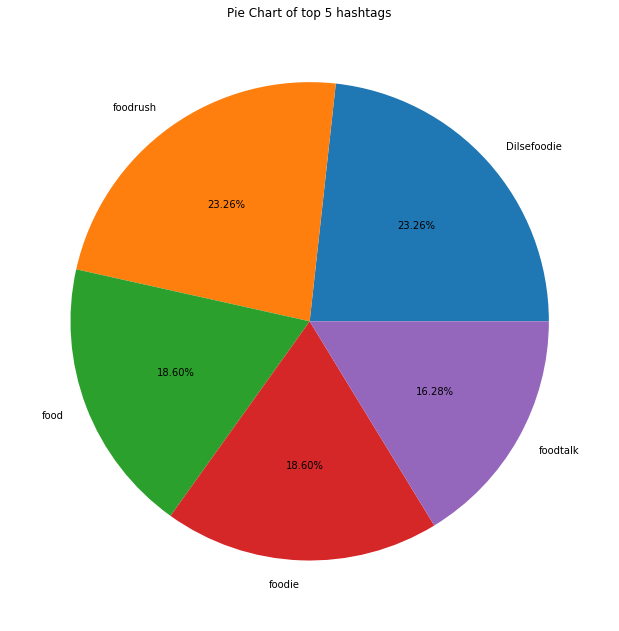

In [47]:
x=hash_word[:5]
y=frequency[:5]
plt.figure(figsize=(11, 11))
plt.pie(y, labels=x, autopct='%.2f%%')
plt.title('Pie Chart of top 5 hashtags')
plt.show()

# 3. You need to also calculate average followers : likes ratio for the obtained handles.
# Followers : Likes ratio is calculated as follows:
## 1) Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [48]:
# return to home page
home_btn = driver.find_element_by_xpath('//div[contains(@class,"Fifk5")]/div/a')
home_btn.click()

In [49]:
likes=[] # store the likes of top 10 posts of the top 5 handles obtained earlier

for user in top_5:
    print(user, end='--> ')
    wait = WebDriverWait(driver,10)
    search_bar_icon = wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'_0aCwM')]/div/div/span")))
    search_bar_icon.click()

    wait = WebDriverWait(driver,10)
    clear_search_content = wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'coreSpriteSearchClear')]")))
    clear_search_content.click()
    
    wait = WebDriverWait(driver,10)
    search_bar = wait.until(EC.presence_of_element_located((By.XPATH,"//input[contains(@class,'x3qfX')]")))
    search_bar.send_keys(user)
    
    wait = WebDriverWait(driver,10)
    first_suggestion = wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='fuqBx']/a/div/div[2]/div/span")))
    first_suggestion.click()
    
    count = 0 # for maintaining the count of no. of posts
    no_of_likes = 0 # for maintaning the count of no. of likes
    
    wait = WebDriverWait(driver,20)
    first_post_photo = wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class=' _2z6nI']/article/div/div/div/div/a/div/div[2]")))
    first_post_photo.click()
    
    while True:
        try:
            WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//div[@class="Nm9Fw"]/button[contains(@class, "_8A5w5")]/span')))
            no_of_likes+=int("".join(driver.find_element_by_xpath('//div[@class="Nm9Fw"]/button[contains(@class, "_8A5w5")]/span').get_attribute('innerHTML').split(',')))
        except TimeoutException:
            WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "HbPOm")]/span[contains(@class, "vcOH2")]/span')))
            no_of_likes+=int("".join(driver.find_element_by_xpath('//div[contains(@class, "HbPOm")]/span[contains(@class, "vcOH2")]/span').get_attribute('innerHTML').split(',')))
        count+=1
        if count>=10:
            break
        wait = WebDriverWait(driver,20)
        next_post_button = wait.until(EC.presence_of_element_located((By.XPATH,"//a[contains(@class,'coreSpriteRightPaginationArrow')]")))
    
    time.sleep(2)
    close_button = driver.find_element_by_class_name('yiMZG')
    close_button.click()
    print("total", no_of_likes, "likes on 10 latest posts")
    likes.append(no_of_likes)

foodys--> total 1311650 likes on 10 latest posts
foodgod--> total 1592550 likes on 10 latest posts
foodrush.recipe--> total 1340170 likes on 10 latest posts
dilsefoodie--> total 39800 likes on 10 latest posts
foodtalkindia--> total 9890 likes on 10 latest posts


In [50]:
top_5=np.array(top_5)
top_5

array(['foodys', 'foodgod', 'foodrush.recipe', 'dilsefoodie',
       'foodtalkindia'], dtype='<U15')

In [51]:
likes=np.array(likes)
likes

array([1311650, 1592550, 1340170,   39800,    9890])

In [54]:
followers[0:5] #followers of those 5 users

array([9600000, 3500000,  660000,  370000,  292000])

## 2) Calculate the average likes for a handle.

In [55]:
average_likes=likes/10
average_likes

array([131165., 159255., 134017.,   3980.,    989.])

## 3) Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [56]:
# followers to likes ratio
ratio=followers[0:5]/average_likes
ratio

array([ 73.19025655,  21.97733195,   4.92474835,  92.96482412,
       295.24772497])

## 4) Create a bar graph to depict the above obtained information.

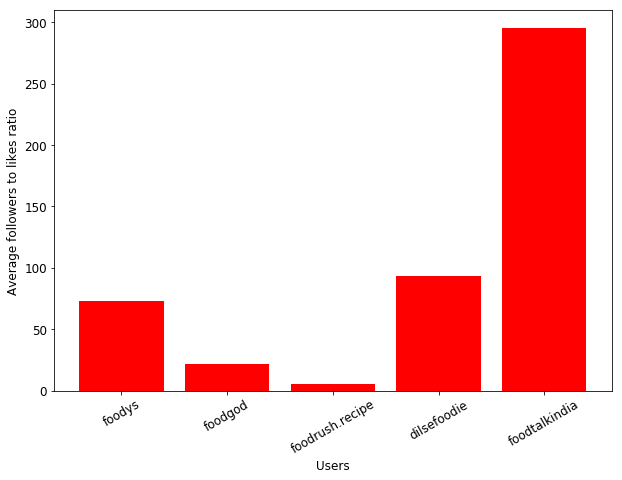

In [58]:
#plotting the graph between average followers to the likes ratio and users.
plt.figure(figsize=(10,7))
plt.bar(top_5, ratio,color='r')
plt.xticks(rotation=30, size=12)
plt.xlabel('Users', size=12)
plt.ylabel('Average followers to likes ratio', size=12)
plt.yticks(size=12)
plt.show()